# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()
data = pd.read_csv('/Users/vpavandijk/Downloads/PS_20174392719_1491204439457_log.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [9]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
data['isFraud'].value_counts() # after discussion this is the output variable.

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
data['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
245        4
655        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [13]:
data['nameOrig'].value_counts()

C2051359467    3
C1976208114    3
C400299098     3
C1462946854    3
C1784010646    3
              ..
C707516457     1
C1344783875    1
C1904239985    1
C1014136621    1
C647322486     1
Name: nameOrig, Length: 6353307, dtype: int64

In [14]:
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M201167761       1
C573695158       1
M585602096       1
M916085113       1
C1805602132      1
Name: nameDest, Length: 2722362, dtype: int64

### What is the distribution of the outcome? 

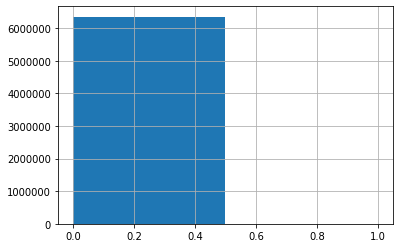

In [18]:
# Your response here

# not sure what is meant here....

data['isFraud'].hist(bins=2)


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [19]:
# Your code here

# Drop the 'nameOrig' and 'nameDest' colums as they are objects with way to many different values
# Drop 'IsFlaggedFraud' column as the 'IsFraud' column is the output variable we are looking for.
# create dummies for "type" column


data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1, inplace = True)


data_dummy = pd.get_dummies(data=data, columns=['type'], drop_first=True)

data_dummy.head()

# no idea what to do with time variable 'step'....

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [20]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data_dummy.drop(['isFraud'], axis=1)
y = data_dummy['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(r2_score(y_test, y_pred))

/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4967353351743523


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# I really have problems understanding the output numbers of r2_score and accuracy....

0.9993618029542808

### Now pick a model of your choice and evaluate its accuracy.

In [22]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
 
clf_rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9996999521352216

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier().fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test)
accuracy_score(y_test, Y_pred_neigh)

# I stopped this cell running after +- 15 minutes.... Is this normal?

### Which model worked better and how do you know?

In [ ]:
# Your response here

# no idea..... Really need to understand this better....